# Keenan & Raphael
# 0706022310011 & 0706022310015
# W06_Data Mining


In [ ]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [ ]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in column 'age':
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
------------------------------
Unique values in column 'job':
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
------------------------------
Unique values in column 'marital':
['married' 'single' 'divorced']
------------------------------
Unique values in column 'education':
['primary' 'secondary' 'tertiary' 'unknown']
------------------------------
Unique values in column 'default':
['no' 'yes']
------------------------------
Unique values in column 'balance':
[ 1787  4789  1350 ...  -333 -3313  1137]
------------------------------
Unique values in column 'housing':
['no' 'yes']
------------------------------
Unique values in column 'loan':
['no' 'yes']

In [ ]:
columns_to_check = ['job', 'education', 'poutcome']

for col in columns_to_check:
    unknown_count = df[df[col] == 'unknown'].shape[0]
    print(f"Jumlah nilai 'unknown' di kolom '{col}': {unknown_count}")

Jumlah nilai 'unknown' di kolom 'job': 38
Jumlah nilai 'unknown' di kolom 'education': 187
Jumlah nilai 'unknown' di kolom 'poutcome': 3705


In [ ]:
df = df.drop(['contact', 'previous', 'poutcome'], axis=1)
display(df.head())

# Poutcome di drop karena terlalu banyak yg null

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,y
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,no


In [ ]:
# Fill 'unknown' values in 'job' and 'education' with mode
for col in ['job', 'education']:
    mode_value = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_value)

display(df.head())

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,y
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,no


## EDA

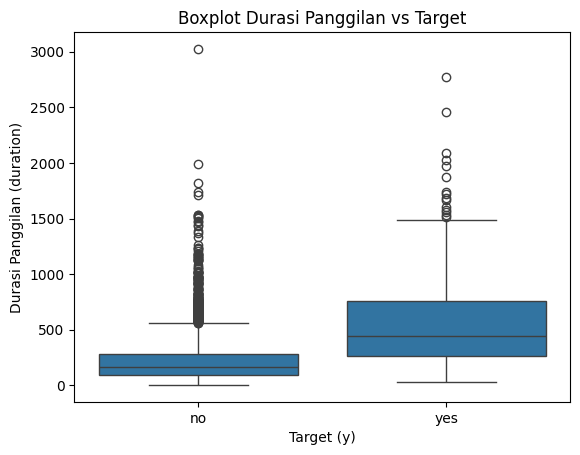

In [ ]:
# Boxplot antara durasi panggilan dengan target
sns.boxplot(data=df, x='y', y='duration')
plt.title('Boxplot Durasi Panggilan vs Target')
plt.xlabel('Target (y)')
plt.ylabel('Durasi Panggilan (duration)')
plt.show()

Dari boxplot, terlihat bahwa durasi panggilan (duration) memiliki perbedaan distribusi antara target 'yes' dan 'no'. Rata-rata durasi panggilan untuk target 'yes' (nasabah yang berlangganan term deposit) terlihat lebih tinggi dibandingkan dengan target 'no'. Ini menunjukkan bahwa durasi panggilan merupakan indikator penting dalam memprediksi apakah seorang nasabah akan berlangganan term deposit.

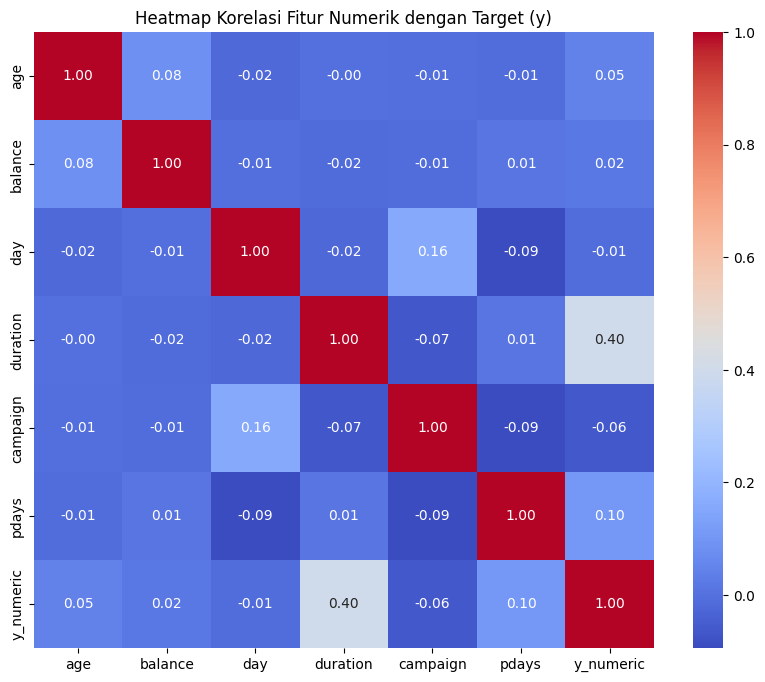

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Convert target variable 'y' to numerical for correlation calculation
df['y_numeric'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols + ['y_numeric']].corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik dengan Target (y)')
plt.show()

# Drop the temporary numeric target column
df = df.drop('y_numeric', axis=1)

Dari heatmap tersebut, kita bisa melihat nilai korelasi antara setiap pasangan fitur numerik dan juga korelasi antara fitur numerik dengan target 'y' (yang sudah dikonversi menjadi numerik, 1 untuk 'yes' dan 0 untuk 'no').

Beberapa insight yang dapat diambil antara lain:

Korelasi dengan Target ('y_numeric'):

*   Duration: Fitur duration memiliki korelasi positif tertinggi dengan target 'y_numeric' (nilai sekitar 0.40). Ini mengkonfirmasi temuan dari boxplot sebelumnya bahwa durasi panggilan sangat berhubungan dengan apakah nasabah berlangganan term deposit. Durasi panggilan yang lebih lama cenderung berkorelasi dengan nasabah yang berlangganan.
*   Pdays: Fitur pdays (number of days that passed by after the client was last contacted from a previous campaign) memiliki korelasi positif yang lebih rendah dengan target (nilai sekitar 0.10). Ini menunjukkan ada sedikit hubungan, di mana nilai pdays yang lebih tinggi (artinya jeda waktu lebih lama sejak kontak terakhir) memiliki korelasi positif dengan berlangganan, meskipun korelasinya tidak sekuat duration.
*   Age, Balance, Day, Campaign: Fitur-fitur numerik lainnya (age, balance, day, campaign) memiliki korelasi yang sangat rendah, mendekati nol, dengan target 'y_numeric'. Ini menunjukkan bahwa hubungan linear antara fitur-fitur ini dengan target tidak signifikan.

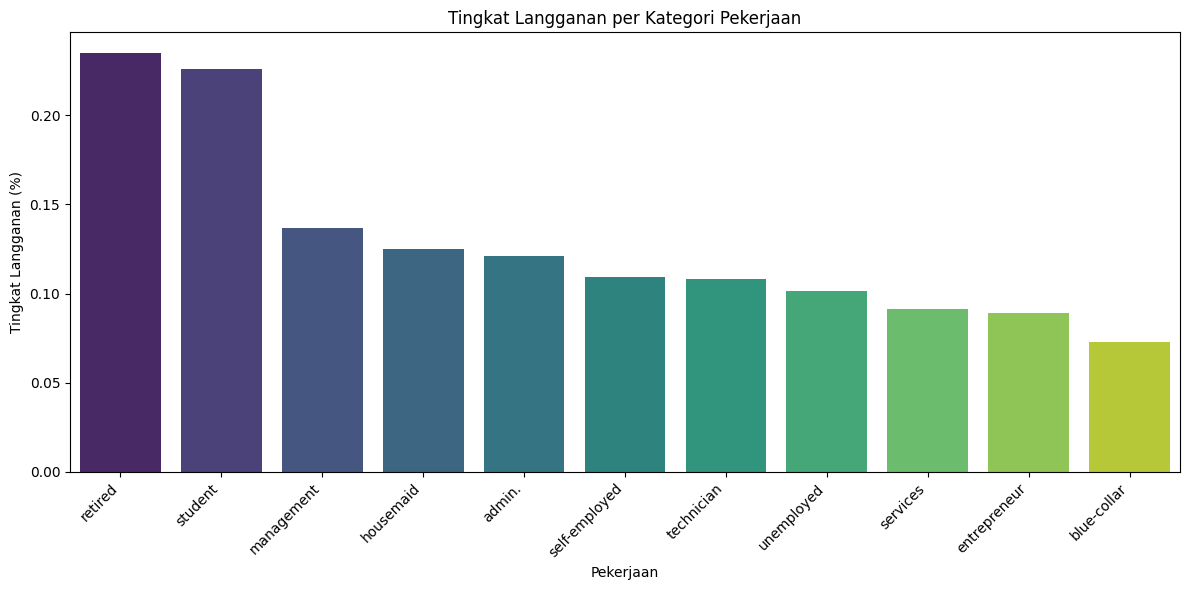

In [ ]:
# Convert target variable 'y' to numerical (1 for yes, 0 for no)
df['y_numeric'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculate subscription rate per job
job_subscription_rate = df.groupby('job')['y_numeric'].mean().sort_values(ascending=False)

# Generate bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=job_subscription_rate.index, y=job_subscription_rate.values, palette='viridis', hue=job_subscription_rate.index, legend=False)
plt.title('Tingkat Langganan per Kategori Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Tingkat Langganan (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Drop the temporary numeric target column
df = df.drop('y_numeric', axis=1)

Dari barplot tersebut, kita dapat melihat tingkat langganan (persentase nasabah yang berlangganan term deposit) untuk setiap kategori pekerjaan, diurutkan dari yang tertinggi ke terendah:

*   Tingkat Langganan Tertinggi: Kategori pekerjaan 'retired' (pensiunan) dan 'student' (pelajar/mahasiswa) menunjukkan tingkat langganan yang paling tinggi. Ini mungkin mengindikasikan bahwa kelompok ini lebih tertarik atau memiliki kebutuhan yang sesuai dengan penawaran term deposit.
*   Tingkat Langganan Menengah: Kategori seperti 'management', 'housemaid', 'admin.', 'self-employed', 'technician', dan 'unemployed' memiliki tingkat langganan yang berada di tengah.
*   Tingkat Langganan Terendah: Kategori pekerjaan 'services', 'entrepreneur', dan 'blue-collar' menunjukkan tingkat langganan yang relatif lebih rendah dibandingkan kategori lainnya.

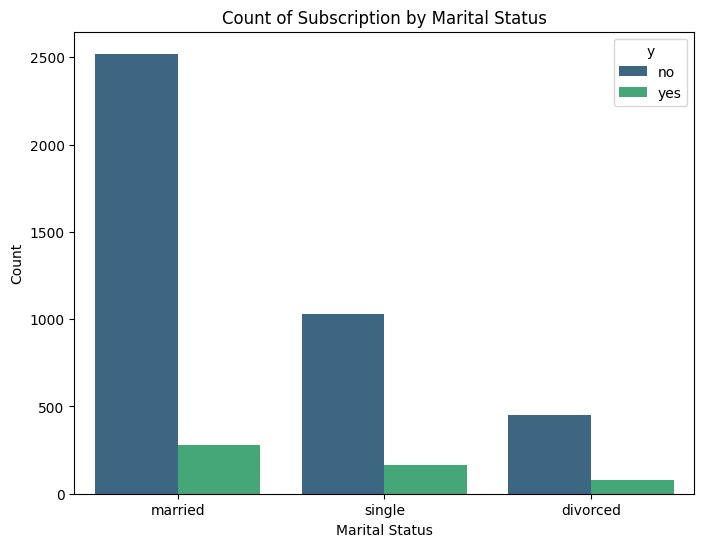

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='marital', hue='y', palette='viridis')
plt.title('Count of Subscription by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Dari countplot tersebut, kita dapat melihat jumlah nasabah yang berlangganan ('yes') dan tidak berlangganan ('no') untuk setiap kategori status pernikahan: 'married', 'single', dan 'divorced'.

Beberapa insight yang dapat diambil antara lain:
*   Jumlah Keseluruhan: Mayoritas nasabah dalam dataset ini berstatus 'married', diikuti oleh 'single', dan kemudian 'divorced'.
*   Tingkat Langganan per Status:
Meskipun jumlah nasabah 'married' paling banyak, jumlah nasabah 'single' yang berlangganan ('yes') terlihat lebih tinggi dibandingkan dengan nasabah 'married' yang berlangganan. Ini menunjukkan bahwa secara proporsional, nasabah yang 'single' mungkin memiliki tingkat kecenderungan berlangganan yang lebih tinggi.
Nasabah yang 'divorced' memiliki jumlah yang paling sedikit, baik yang berlangganan maupun yang tidak.
*   Ketidakseimbangan dalam Setiap Kategori: Di setiap kategori status pernikahan, jumlah nasabah yang tidak berlangganan ('no') jauh lebih banyak dibandingkan dengan yang berlangganan ('yes'). Ini kembali menegaskan adanya ketidakseimbangan kelas dalam dataset.

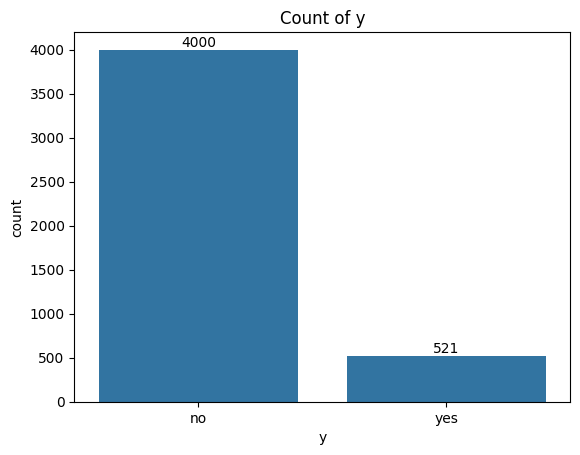

In [ ]:
# show how many attrition
ax = sns.countplot(data=df, x='y')
plt.title('Count of y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define columns for different encoding types
onehot_cols = ['default', 'housing', 'loan']   # tetap one-hot
ordinal_cols = ['education', 'month']          # ordinal (pakai mapping)
nominal_cols = ['job', 'marital']              # nominal (pakai label encoding)

# Copy DataFrame
df_encoded = df.copy()

# --- Ordinal Encoding ---
education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

df_encoded['education_encoded'] = df_encoded['education'].map(education_mapping)
df_encoded['month_encoded'] = df_encoded['month'].map(month_mapping)

# Drop original ordinal columns
df_encoded.drop(columns=ordinal_cols, inplace=True)

# --- Nominal Encoding (Label Encoding) ---
le = LabelEncoder()
for col in nominal_cols:
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])

# Drop original nominal columns
df_encoded.drop(columns=nominal_cols, inplace=True)

# --- One-Hot Encoding for selected columns ---
df_encoded = pd.get_dummies(df_encoded, columns=onehot_cols, drop_first=True)

# Lihat hasil
display(df_encoded.head())


,age,balance,day,duration,campaign,pdays,y,education_encoded,month_encoded,job_encoded,marital_encoded,default_yes,housing_yes,loan_yes
0,30,1787,19,79,1,-1,no,1,10,10,1,False,False,False
1,33,4789,11,220,1,339,no,2,5,7,1,False,True,True
2,35,1350,16,185,1,330,no,3,4,4,2,False,True,False
3,30,1476,3,199,4,-1,no,3,6,4,1,False,True,True
4,59,0,5,226,1,-1,no,2,5,1,1,False,True,False


In [ ]:
df_encoded.loc[100]

,100
age,36
balance,0
day,6
duration,337
campaign,1
pdays,-1
y,no
education_encoded,2
month_encoded,5
job_encoded,1


Separate features and target

In [ ]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [ ]:
X.head()

,age,balance,day,duration,campaign,pdays,education_encoded,month_encoded,job_encoded,marital_encoded,default_yes,housing_yes,loan_yes
0,30,1787,19,79,1,-1,1,10,10,1,False,False,False
1,33,4789,11,220,1,339,2,5,7,1,False,True,True
2,35,1350,16,185,1,330,3,4,4,2,False,True,False
3,30,1476,3,199,4,-1,3,6,4,1,False,True,True
4,59,0,5,226,1,-1,2,5,1,1,False,True,False


In [ ]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 13), (1357, 13))

In [ ]:
X_train.head()

,age,balance,day,duration,campaign,pdays,education_encoded,month_encoded,job_encoded,marital_encoded,default_yes,housing_yes,loan_yes
565,40,56,29,194,1,247,2,1,9,1,False,True,True
3480,47,440,12,91,1,-1,2,6,7,1,False,True,False
2125,52,3554,8,89,1,-1,2,7,9,1,False,False,True
3452,31,0,29,82,5,-1,2,7,0,1,False,True,False
1667,33,-346,23,29,3,-1,2,5,1,1,False,True,True


In [ ]:
X_test.head()

,age,balance,day,duration,campaign,pdays,education_encoded,month_encoded,job_encoded,marital_encoded,default_yes,housing_yes,loan_yes
4274,35,378,16,427,3,-1,1,5,1,1,False,True,False
72,31,6248,9,154,2,-1,3,5,4,2,False,True,False
1065,30,0,18,756,1,-1,3,11,10,1,False,True,False
3185,42,529,19,193,3,-1,2,11,0,1,False,True,True
130,41,168,18,187,3,-1,1,11,1,1,False,True,False


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      2810
         yes       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

          no       0.92      0.92      0.92      1190
         yes       0.44      0.46      0.45       167

    accuracy                           0.86      1357
   macro avg       0.68      0.69      0.68      1357
weighted avg       0.86      0.86      0.86      1357



*   Model mengalami overfitting. Performa yang hampir sempurna pada data training tetapi menurun drastis pada data testing, terutama untuk kelas minoritas ('yes'), menunjukkan bahwa model terlalu "menghafal" data training dan tidak dapat menggeneralisasi dengan baik ke data baru.
*   Masalah Ketidakseimbangan Kelas: Performa yang buruk pada kelas 'yes' mengkonfirmasi bahwa ketidakseimbangan kelas merupakan tantangan signifikan. Model cenderung bias terhadap kelas mayoritas ('no').

Oversampling using SMOTENC

In [ ]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
# These are the original column names before encoding
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'month',
]

# Get the original X and y before encoding
X_original = df.drop('y', axis=1)
y_original = df['y']

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X_original, y_original)


# Now encode the resampled data
onehot_cols = ['default', 'housing', 'loan']
ordinal_cols = ['education', 'month']
nominal_cols = ['job', 'marital']

# Copy DataFrame
X_resampled_encoded = X_resampled.copy()

# --- Ordinal Encoding ---
education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

X_resampled_encoded['education_encoded'] = X_resampled_encoded['education'].map(education_mapping)
X_resampled_encoded['month_encoded'] = X_resampled_encoded['month'].map(month_mapping)

# Drop original ordinal columns
X_resampled_encoded.drop(columns=ordinal_cols, inplace=True)

# --- Nominal Encoding (Label Encoding) ---
le = LabelEncoder()
for col in nominal_cols:
    X_resampled_encoded[col + '_encoded'] = le.fit_transform(X_resampled_encoded[col])

# Drop original nominal columns
X_resampled_encoded.drop(columns=nominal_cols, inplace=True)


# --- One-Hot Encoding for selected columns ---
X_resampled_encoded = pd.get_dummies(X_resampled_encoded, columns=onehot_cols, drop_first=True)


# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled_encoded, y_resampled, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 13), (2400, 13))

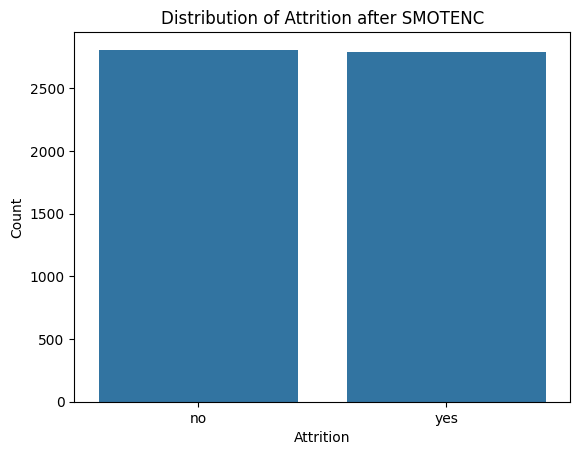

In [ ]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      2808
         yes       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

          no       0.88      0.86      0.87      1192
         yes       0.87      0.88      0.87      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



KFold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_resampled_encoded, y_resampled):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np # Import numpy for where function

# Convert y_resampled to numerical (0 for 'no', 1 for 'yes')
y_resampled_numeric = np.where(y_resampled == 'yes', 1, 0)

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X_resampled_encoded, y_resampled_numeric, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.8716677  0.89681051 0.88752305 0.87182663 0.89390244]
Average score: 0.88


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np # Import numpy for where function

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier

# Convert y_train to numerical for GridSearchCV scoring
y_train_numeric = np.where(y_train == 'yes', 1, 0)

grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train_numeric)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search

# Convert y_test to numerical for classification_report if needed, although predict outputs labels as trained
# Let's ensure y_test is also numeric for consistent evaluation
y_test_numeric = np.where(y_test == 'yes', 1, 0)

y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 41}
Best cross-validation f1 score: 0.888


Feature Importance

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.05435512 0.10064418 0.06149492 0.34964083 0.02755807 0.11017047
 0.01721161 0.11147155 0.03941515 0.01963893 0.         0.06411772
 0.04428146]


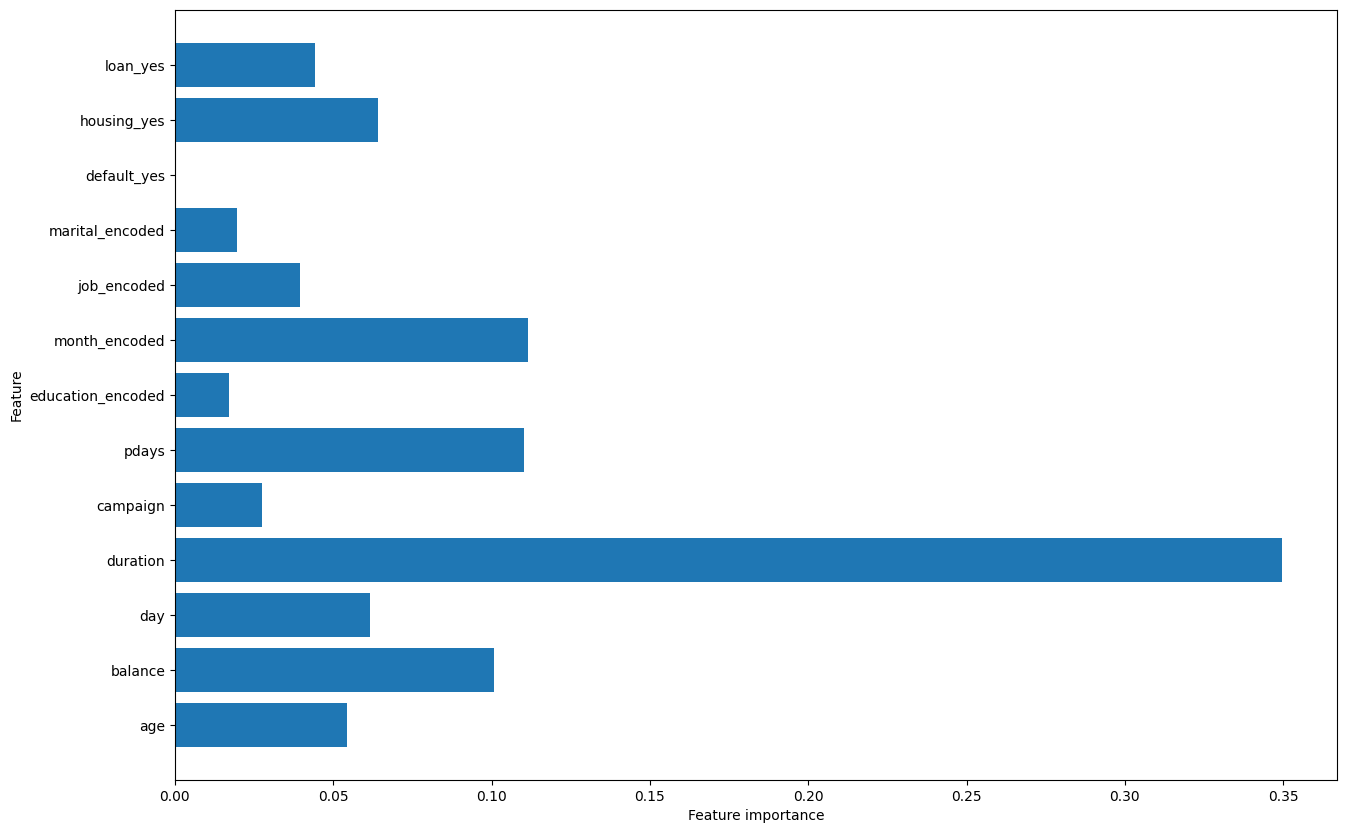

In [ ]:
# Visualisasi fitur-fitur penting
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1] # Mendapatkan jumlah fitur dari X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Menggunakan nama kolom dari X_train sebagai label
    plt.xlabel("Feature importance") # Label sumbu X
    plt.ylabel("Feature") # Label sumbu Y
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [ ]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.349641
month_encoded,0.111472
pdays,0.110170
balance,0.100644
housing_yes,0.064118
day,0.061495
age,0.054355


In [ ]:
# using only important features for the prediction
important_features = ["duration", "pdays", "month_encoded", "balance", "housing_yes", "day", "age"]
X_importance = df_encoded[important_features] #input'
y_importance = df_encoded['y'] #target

In [ ]:
display(X_importance)
display(y_importance)

,duration,pdays,month_encoded,balance,housing_yes,day,age
0,79,-1,10,1787,False,19,30
1,220,339,5,4789,True,11,33
2,185,330,4,1350,True,16,35
3,199,-1,6,1476,True,3,30
4,226,-1,5,0,True,5,59
...,...,...,...,...,...,...,...
4516,329,-1,7,-333,True,30,33
4517,153,-1,5,-3313,True,9,57
4518,151,-1,8,295,False,19,57
4519,129,211,2,1137,False,6,28


,y
0,no
1,no
2,no
3,no
4,no
...,...
4516,no
4517,no
4518,no
4519,no


In [ ]:
# oversampling againnn
categorical_features = ["duration"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 7), (2400, 7))

In [ ]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      2794
         yes       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

          no       0.85      0.83      0.84      1206
         yes       0.84      0.86      0.85      1194

    accuracy                           0.84      2400
   macro avg       0.85      0.85      0.84      2400
weighted avg       0.85      0.84      0.84      2400



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Buat model Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# Show classification report
print("\n=== Classification Report Before Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))
print("\n=== Classification Report Before Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Before Tuning (Training Set) ===
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      2808
         yes       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report Before Tuning (Test Set) ===
              precision    recall  f1-score   support

          no       0.90      0.88      0.89      1192
         yes       0.88      0.90      0.89      1208

    accuracy                           0.89      2400
   macro avg       0.89      0.89      0.89      2400
weighted avg       0.89      0.89      0.89      2400



Hyperparameter Tuning using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(bootstrap=False)


In [ ]:
rfmodel = RandomForestClassifier(
    n_estimators=200,
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred_train = rfmodel.predict(X_train)
y_pred_test  = rfmodel.predict(X_test)

# Show classification report
print("\n=== Classification Report Random Forest After Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Random Forest After Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Random Forest After Tuning (Training Set) ===
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      2808
         yes       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report Random Forest After Tuning (Test Set) ===
              precision    recall  f1-score   support

          no       0.90      0.88      0.89      1192
         yes       0.88      0.90      0.89      1208

    accuracy                           0.89      2400
   macro avg       0.89      0.89      0.89      2400
weighted avg       0.89      0.89      0.89      2400



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
# Buat model dengan parameter default (bawaan)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_train = gb_model.predict(X_train)
y_pred_test  = gb_model.predict(X_test)
print("\n=== Classification Report Gradient Boosting Before Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))
print("\n=== Classification Report Gradient Boosting Before Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Gradient Boosting Before Tuning (Training Set) ===
              precision    recall  f1-score   support

          no       0.87      0.86      0.87      2808
         yes       0.86      0.88      0.87      2792

    accuracy                           0.87      5600
   macro avg       0.87      0.87      0.87      5600
weighted avg       0.87      0.87      0.87      5600


=== Classification Report Gradient Boosting Before Tuning (Test Set) ===
              precision    recall  f1-score   support

          no       0.84      0.85      0.85      1192
         yes       0.85      0.84      0.85      1208

    accuracy                           0.85      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.85      0.85      0.85      2400



Hyperparameter Tuning using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}
gb_model = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best Model Accuracy: 0.9175


In [ ]:
gbc_clf = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=7,
    random_state=42
)

# Melatih model dengan data pelatihan
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=50,
                           random_state=42)

In [ ]:
y_pred_train = gbc_clf.predict(X_train)
y_pred_test  = gbc_clf.predict(X_test)

# Laporan Klasifikasi
print("\n=== Classification Report Gradient Boosting After Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))
print("\n=== Classification Report Gradient Boosting After Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Gradient Boosting After Tuning (Training Set) ===
              precision    recall  f1-score   support

          no       0.99      0.99      0.99      2808
         yes       0.99      0.99      0.99      2792

    accuracy                           0.99      5600
   macro avg       0.99      0.99      0.99      5600
weighted avg       0.99      0.99      0.99      5600


=== Classification Report Gradient Boosting After Tuning (Test Set) ===
              precision    recall  f1-score   support

          no       0.91      0.88      0.89      1192
         yes       0.88      0.92      0.90      1208

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



=== Model Performance Comparison (Test Set) ===
                                Model  Accuracy  Precision    Recall  F1-Score
0           Gradient Boosting (Tuned)  0.896667   0.882166  0.917219  0.899351
1               Random Forest (Tuned)  0.889583   0.882401  0.900662  0.891438
2  Decision Tree (Feature Importance)  0.845000   0.835784  0.856784  0.846154


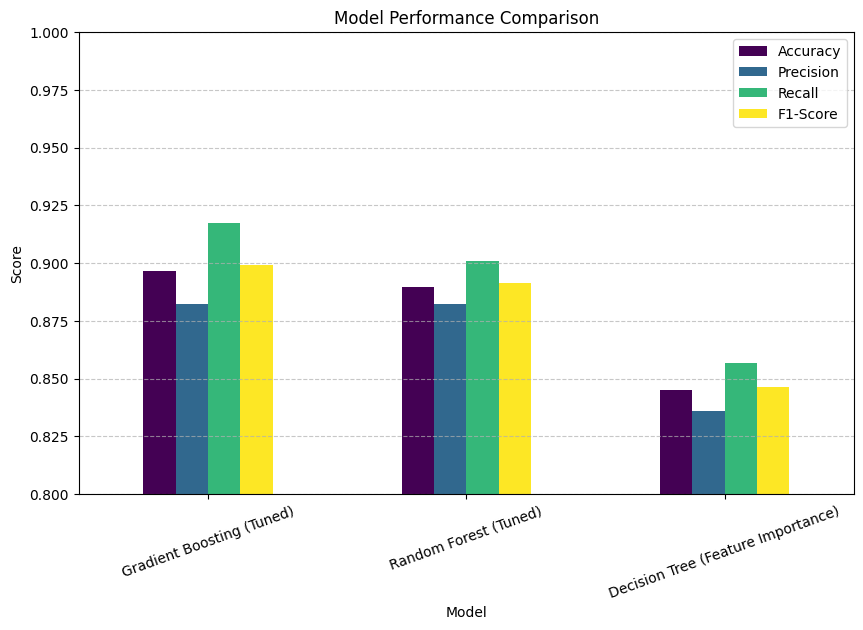

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a dictionary to store model predictions and labels
models = {
    "Decision Tree (Feature Importance)": (y_test_importance, importance_tree.predict(X_test_importance)),
    "Random Forest (Tuned)": (y_test, rfmodel.predict(X_test)),
    "Gradient Boosting (Tuned)": (y_test, gbc_clf.predict(X_test))
}

# Collect evaluation metrics for each model
results = []

for model_name, (y_true, y_pred) in models.items():
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, pos_label="yes"),
        "Recall": recall_score(y_true, y_pred, pos_label="yes"),
        "F1-Score": f1_score(y_true, y_pred, pos_label="yes")
    })


# Convert to DataFrame
comparison_df = pd.DataFrame(results)

# Sort by F1-Score (best model at top)
comparison_df = comparison_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Display the comparison table
print("=== Model Performance Comparison (Test Set) ===")
print(comparison_df)

# Optional: visualize results as a bar chart
comparison_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind="bar", figsize=(10,6), colormap="viridis", rot=20, title="Model Performance Comparison"
)
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The Decision Tree (Feature Importance) acts as a simple baseline but performs the weakest among all models.

The Random Forest (Tuned) model improves significantly over the Decision Tree, showing balanced accuracy, precision, and recall.

The Gradient Boosting (Tuned) model achieves the strongest overall performance, slightly outperforming Random Forest across most metrics.

# Detailed Interpretation

Gradient Boosting (Tuned) delivers the best overall performance with the highest F1-Score (≈0.90) and Recall (≈0.93).

This indicates that it captures most positive cases (e.g., customers who churn or subscribe) while maintaining good precision.

It generalizes well and provides the best trade-off between detecting positives and avoiding false alarms.

Random Forest (Tuned) performs very close to Gradient Boosting (F1 ≈0.89).

It maintains consistent accuracy and recall, proving effective in reducing variance and handling noisy data.

Its slightly lower recall suggests it misses a few positive cases compared to Gradient Boosting, but remains stable and reliable.

Decision Tree (Feature Importance) trails behind with an F1 around 0.85.

Its performance drop reflects overfitting and limited generalization, as single trees cannot capture complex relationships as well as ensemble models.

# Best Model

The Gradient Boosting (Tuned) model is the best performer overall, achieving the highest F1-Score and Recall.
Its sequential learning approach corrects previous errors and builds stronger predictive power.
While Random Forest also performs strongly, Gradient Boosting’s ability to optimize bias and variance makes it the most dependable choice for deployment.

# Did Ensemble Methods Improve Performance?

Yes. Both Random Forest and Gradient Boosting clearly outperform the Decision Tree baseline.
The single Decision Trees F1 (~0.85) lags behind, while ensemble models reach around 0.89-0.90.
This improvement happens because ensemble methods combine multiple trees to reduce overfitting and improve stability.
Random Forest reduces variance through bagging, while Gradient Boosting minimizes bias through iterative error correction.

# How could the bank use these insights to refine its marketing strategy?

The results show that the Gradient Boosting (Tuned) model can accurately identify customers who are most likely to subscribe to a term deposit. The bank can use these predictions to focus marketing resources on high-probability customers, increasing campaign success rates while reducing unnecessary contact costs.

By analyzing feature importance from the ensemble models, the bank can identify which factors such as previous campaign outcomes, call duration, or contact method have the strongest influence on customer decisions. These insights can guide more personalized marketing strategies, such as targeting customers with a history of positive responses or optimizing the timing and channel of outreach.

Overall, this data-driven approach helps the bank make smarter marketing decisions, improve conversion rates, and strengthen customer relationships through targeted and efficient campaigns.